# Proyecto de clustering de segmentación de países por datos socio-económicos

Importamos las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_country = pd.read_csv('Country-data.csv', sep = ',')
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Manejar los valores nulos

In [5]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

* No ternemos valores nulos

### Manejar los valores duplicados

In [6]:
df_country.duplicated().sum()

0

* No tenemos ningun valor duplicado

### Analisís de distribución

In [7]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


* Sabemos que existen algunas columnas numericas y de tipo objeto, por lo que para ver el comportamiento de los datos nos quedaremos con las que no son de tipo objeto (en este caso son 9 columnas).

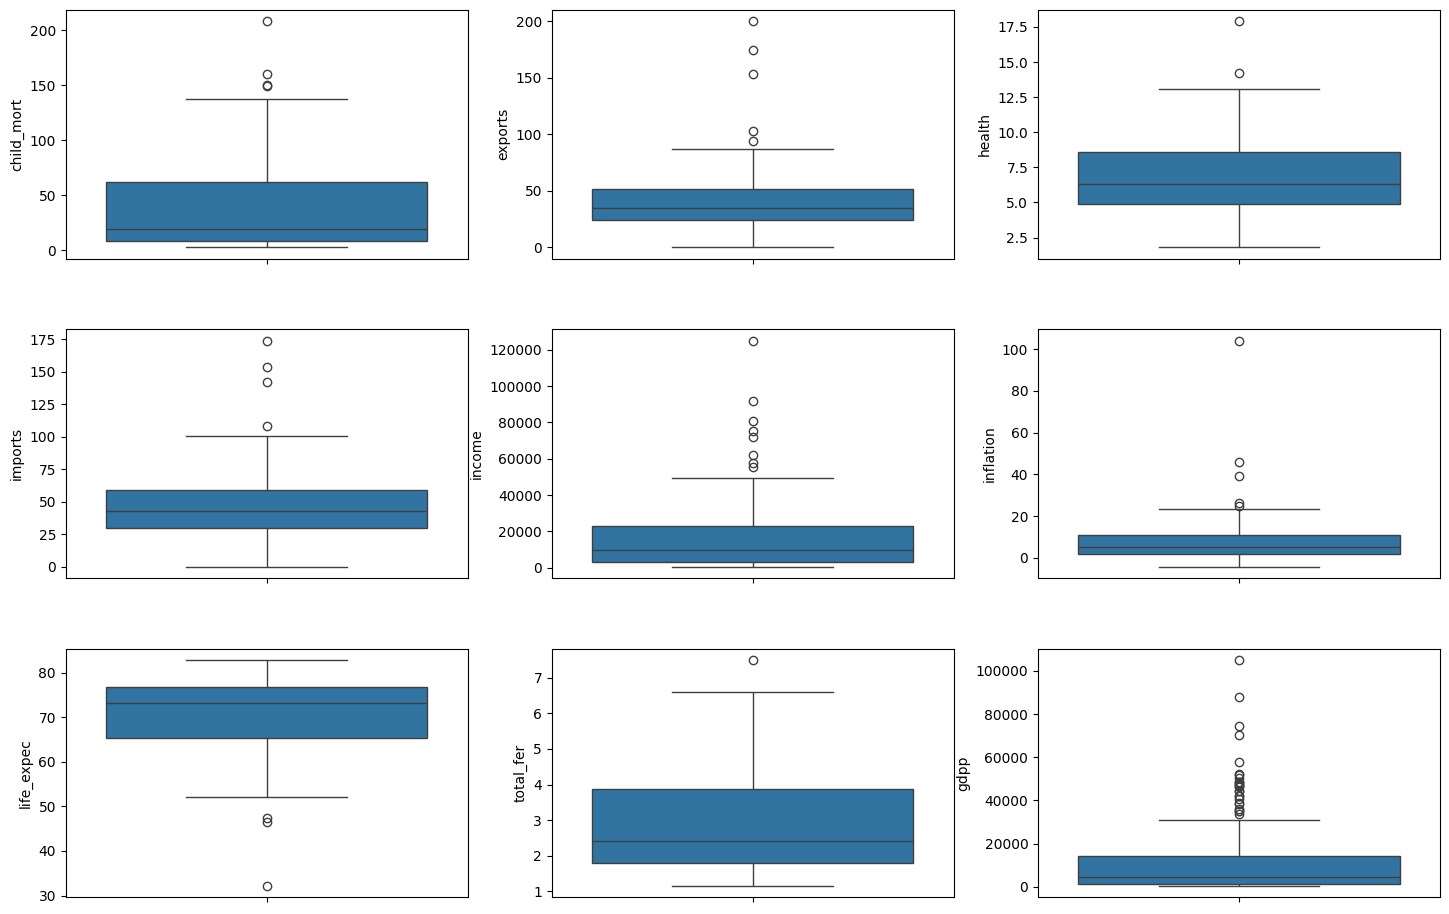

In [8]:
num_cols = df_country.select_dtypes(exclude = 'object').columns # Nombre de las columnas que son solo numericas
fig, axs = plt.subplots(3, 3, figsize = (15, 10))
plt.tight_layout(pad=3)


for i, ax in enumerate(axs.flat):
    sns.boxplot(data = df_country, y = num_cols[i], ax = ax)

* Podemos observar que existen Outliers pero no los eliminaremos debido a que son pocos.
* quizá algunos outlier afecten al comportamiendo de los modelos pero eso lo veremos una vez implementados.

* generaremos un HeatMap para ver sus correlaciones

<Axes: >

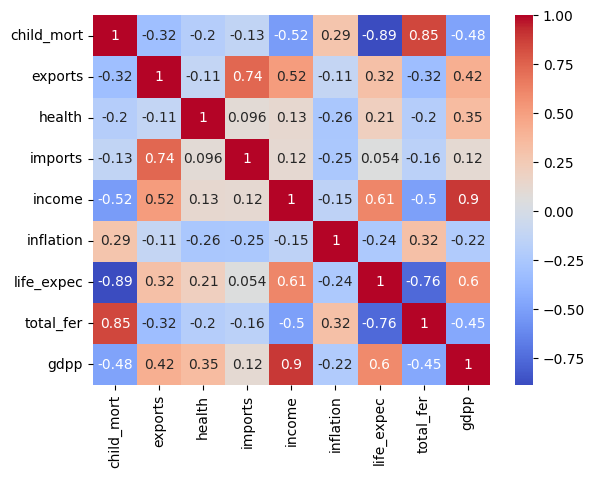

In [9]:
sns.heatmap(df_country.select_dtypes(exclude = 'object').corr(), annot = True, cmap = 'coolwarm')

### Escalar datos

* Proceso importante ya que no todos tienen la mnisma unidad de medida, esto permite que los algoritmos no le den mas peso a variables que no lo ameritan.

In [10]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
df_country_scaled = Scaler.fit_transform(df_country.drop('country', axis = 1))

In [11]:
df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

* Tenemos los datos escalados sin el nombre de las columnas que se las asignaremos luego.

In [12]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country', axis = 1).columns)
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# PCA ( Analisís de componentes principales)

* Reducción de dimensionalidades

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca_scaled = pca.fit_transform(df_country_scaled)
pca_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

* En teroria el PCA no deberia cambiar la varianza de los datos originales de los transformados.

In [15]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


* Con un indice tengo esta varianza (0.4595174) con respecto al dataset original.
* Con dos indices tengo esta varianza (0.17181626) con respecto al dataset original.
* asi sucesivamente.

* La idea es hacer una suma acumulada de cada uno dependiendo la cantidad de componentes a trabajar.

In [16]:
var_acum = np.cumsum(np.round(var, decimals = 4)) * 100 # para sacar el porcentaje
var_acum

array([45.95, 63.13, 76.13, 87.18, 94.52, 97.  , 98.26, 99.24, 99.98])

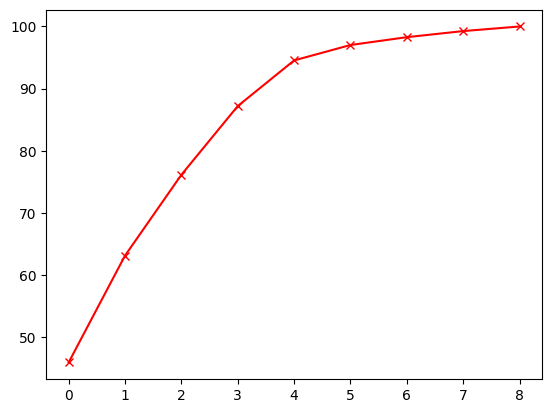

In [17]:
plt.plot(var_acum, 'r-x')

* Lo que explica la grafica anterior es que cuando tengo 2 variables principales explica casi el 65% de la varianza, cuando tengo 4 variables explica casi el 90% de la varianza.
* Como el objetivo es reducir la dimensionalidad y no quedarse con todas las variables, nos quedaremos con 4.

In [18]:
pca_scaled_dim4 = pd.DataFrame(pca_scaled, columns=df_country_scaled.columns).drop(['income',	'inflation','life_expec','total_fer','gdpp'], axis = 1)
pca_scaled_dim4

,child_mort,exports,health,imports
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


* Ahora con nuestra data lista, utilizaremos distintos modelos para clusterizar.

### Importar librerias para clustering

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Modelo Kmeans

### con PCA

* Primero necesitamos saber cual K es el optimo.

In [20]:
sum_squared_distances = []
silhouette_scores = []

k = range(2,15)

for i in k:
    kmean = KMeans(n_clusters = i)
    y_pred = kmean.fit_predict(pca_scaled_dim4)
    sum_squared_distances.append(kmean.inertia_)
    silhouette_scores.append(silhouette_score(pca_scaled_dim4, y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0, 0.5, 'Inertial')

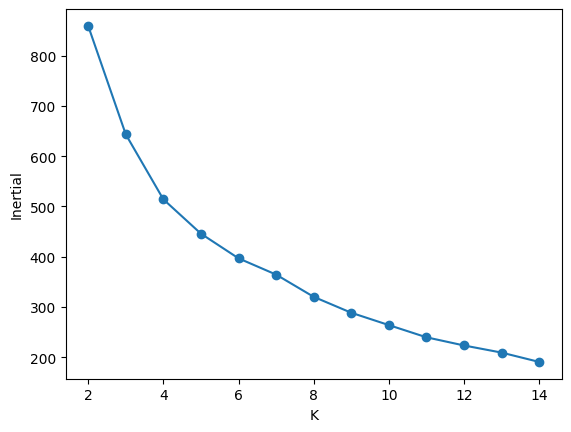

In [21]:
plt.plot(k, sum_squared_distances, 'o-')
plt.xlabel('K')
plt.ylabel('Inertial')

* en el grafico anterior nos quedan dudas de cual es el K optimo (Puede ser 4) por lo que graficaremos el silhouette score.

Text(0, 0.5, 'Silhouette score')

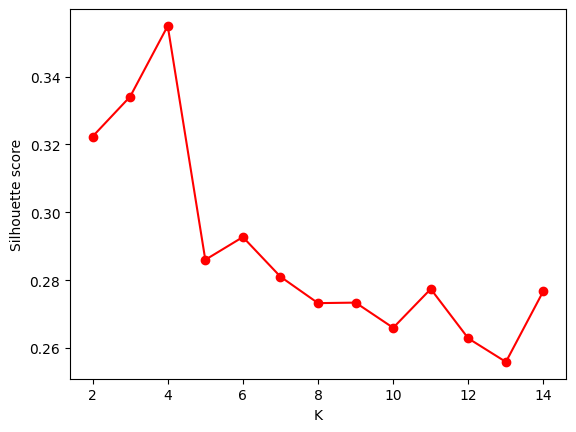

In [22]:
plt.plot(k, silhouette_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Silhouette score')

* Con el grafico anterior podemos confirmar que el k optimo es 4.

In [23]:
km = KMeans(n_clusters = 4)
y_pred = km.fit_predict(pca_scaled_dim4)
print(silhouette_score(pca_scaled_dim4, y_pred)) # lo imprimimos para despues compararlo

df_country['k_means_pca'] = y_pred  # Agregamos al Dataset original nuestra predicción

0.3549131449906333


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Sin PCA

In [24]:
sum_squared_distances = []
silhouette_scores = []

k = range(2,15)

for i in k:
    kmean = KMeans(n_clusters = i)
    y_pred = kmean.fit_predict(df_country_scaled)
    sum_squared_distances.append(kmean.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled, y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0, 0.5, 'Inertial')

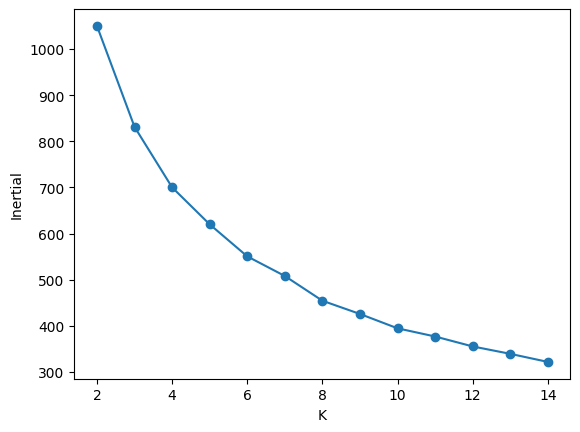

In [25]:
plt.plot(k, sum_squared_distances, 'o-')
plt.xlabel('K')
plt.ylabel('Inertial')

* en esta caso es similar al que contiene PCA.

Text(0, 0.5, 'Silhouette score')

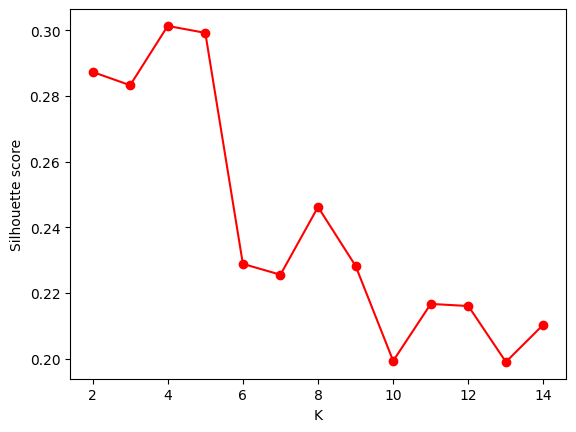

In [26]:
plt.plot(k, silhouette_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Silhouette score')

* en este caso podemos observar que K = 5 deberia ser el optimo.

In [27]:
km = KMeans(n_clusters = 5)
y_pred = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_pred)) # lo imprimimos para despues compararlo

df_country['k_means'] = y_pred  # Agregamos al Dataset original nuestra predicción

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3064507657886972


* se puede observar que el coeficiente de silueta es mayor con k = 4 con PCA en comparación con K = 5 sin PCA.
* se deduce que el PCA está afectando positivamente al algoritmo a obtener mejores resultados.


## Aglomerative hierarchical clustering

### Con PCA

* Lo primero que haremos es ejecutar nuestro dendograma.

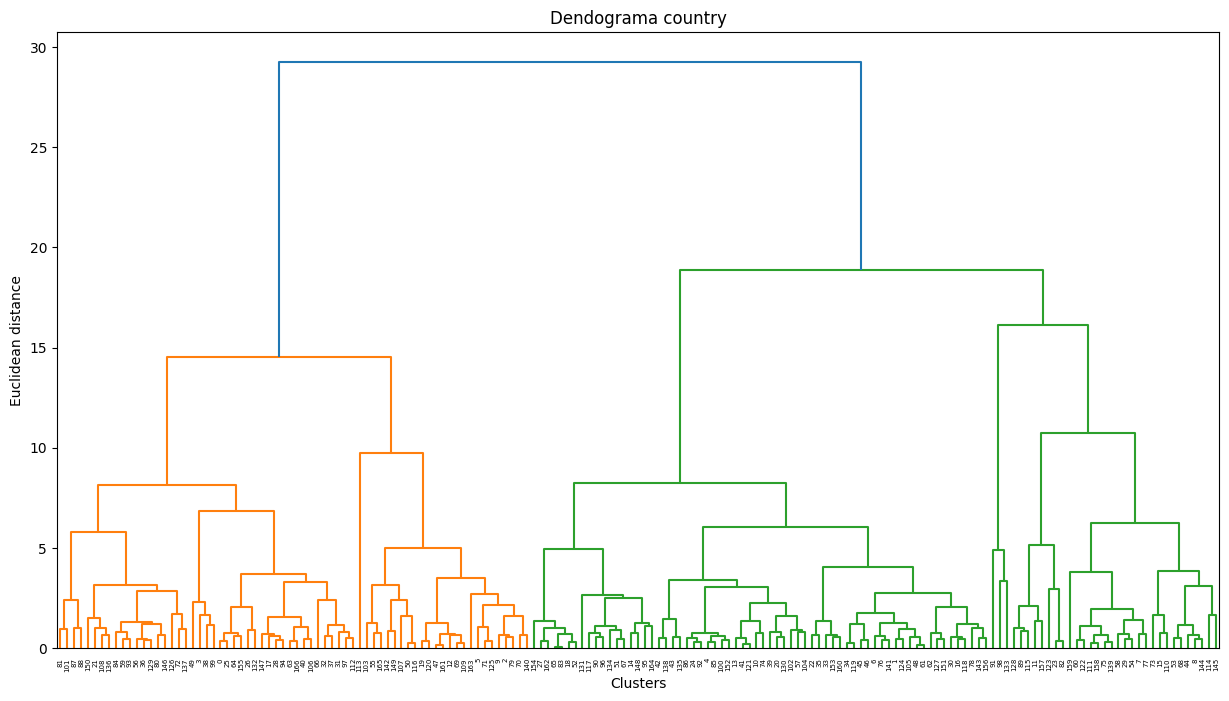

In [28]:
plt.figure(figsize = (15,8))
dendogram = dendrogram(linkage(pca_scaled_dim4, method = 'ward'))
plt.title('Dendograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()


* Podemos observar arriba que existen 2 grandes clusters bien marcados.
* Tambien podemos ver el que le sigue que es de 3 clusters.


In [29]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_pred_hc = hc.fit_predict(pca_scaled_dim4)
print(silhouette_score(pca_scaled_dim4, y_pred_hc))

df_country['hc_pca'] = y_pred_hc

0.3070110704080525


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


* Si cambiamos el n_clusters = 3, nos da un coeficiente de silueta de 0.27 lo que es menor a 0.30 obtenidos con 2 clusters.

### Sin PCA

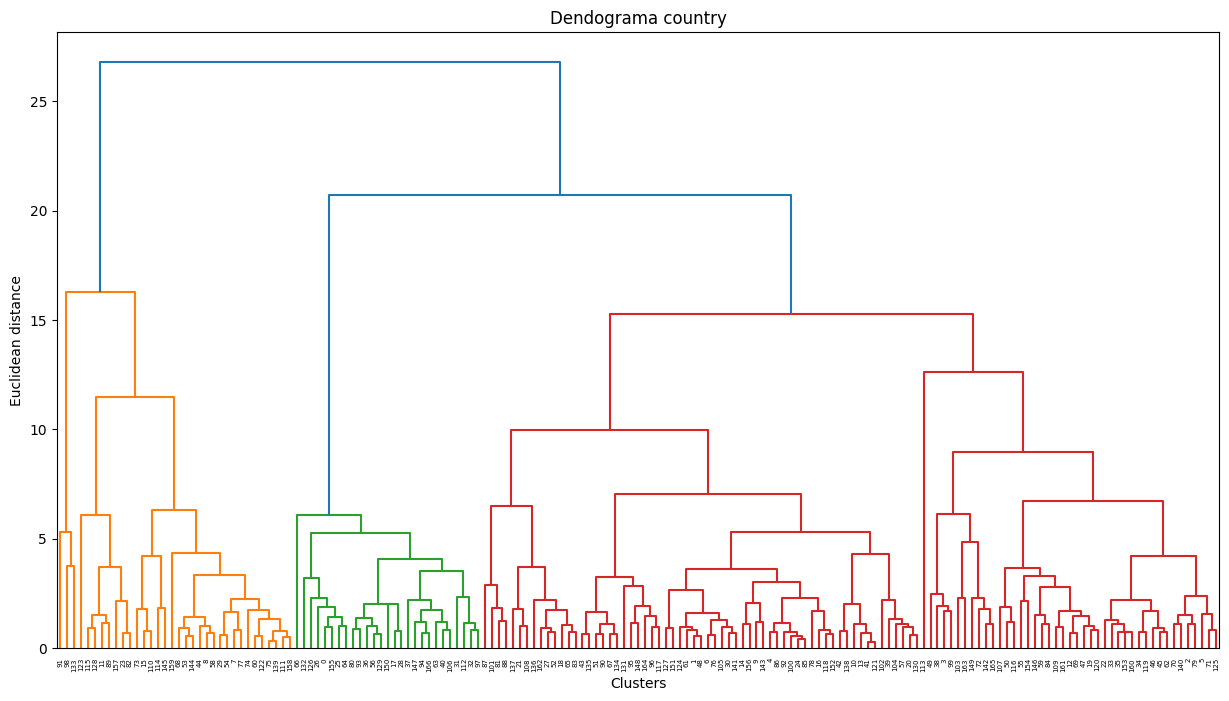

In [30]:
plt.figure(figsize = (15,8))
dendogram = dendrogram(linkage(df_country_scaled, method = 'ward'))
plt.title('Dendograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_pred_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_pred_hc))

df_country['hc'] = y_pred_hc

0.3153134331018189


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


* En este caso el coeficiente de silueta es mayor sin PCA que con PCA (por poco).
* si cambiamos el numero de clusters a 3 es 0.24, menor a 0.31 que nos da con 2 clusters.

## DBSCAN

### Con PCA

In [32]:
from sklearn.neighbors import NearestNeighbors

neaighbors = NearestNeighbors(n_neighbors = 2)
neaighbors_fit = neaighbors.fit(pca_scaled_dim4)
distances, indices = neaighbors_fit.kneighbors(pca_scaled_dim4)

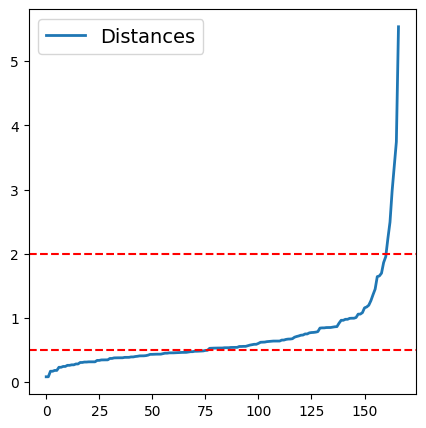

In [33]:
distances = np.sort(distances, axis = 0) # Debido a que el primero es 0 y el que le sigue es la distancia con respecto al primer punto. Si tenemos 2 vecinos este paso se puede omitir.
distances = distances[:, 1]


fig = plt.figure(figsize=(5,5))
plt.plot(distances, linewidth=2, label = "Distances")
plt.axhline(0.5, color='r', linestyle='--' )
plt.axhline(2, color='r', linestyle='--' )
plt.legend(fontsize=14)
plt.show()

* La grafica anterior nos puede dar una noción de que la distancia puede estar entre 0.5 y 2 aprox.

In [34]:
eps_values = np.arange(0.5, 2, 0.1)
min_samples = np.arange(2, 12)

In [35]:
from itertools import product

dbscan_paramns = list(product(eps_values, min_samples))
nro_clusters = []
sil_score = []

for i in dbscan_paramns:
    y_pred_DBSCAN = DBSCAN(eps = i[0], min_samples = i[1]).fit_predict(pca_scaled_dim4)
    try:
        sil_score.append(silhouette_score(pca_scaled_dim4, y_pred_DBSCAN))
    
    except:
        sil_score.append(0)
    nro_clusters.append(len(np.unique(y_pred_DBSCAN)))

In [36]:
df_paramns_tunning = pd.DataFrame(dbscan_paramns, columns = ['Eps', 'Min_samples'])
df_paramns_tunning['sil_score'] = sil_score
df_paramns_tunning['Nro_clusters'] = nro_clusters

In [37]:
df_paramns_tunning

,Eps,Min_samples,sil_score,Nro_clusters
0,0.5,2,-0.210004,21
1,0.5,3,-0.290614,8
2,0.5,4,-0.346912,8
3,0.5,5,-0.270847,3
4,0.5,6,-0.270847,3
...,...,...,...,...
145,1.9,7,0.508155,2
146,1.9,8,0.508155,2
147,1.9,9,0.508155,2
148,1.9,10,0.490310,2


In [38]:
pivot_1 = pd.pivot_table(data = df_paramns_tunning, index = 'Min_samples', columns = 'Eps', values = 'sil_score')
pivot_1

Eps,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
Min_samples,,,,,,,,,,,,,,,
2,-0.210004,-0.126094,-0.212654,-0.191915,-0.211363,-0.201136,0.115940,0.113880,0.110274,0.265412,0.466650,0.466650,0.501720,0.501720,0.528639
3,-0.290614,-0.153373,-0.183408,-0.133920,-0.165125,0.006072,0.186189,0.185912,0.182938,0.435390,0.466650,0.466650,0.501720,0.501720,0.528639
4,-0.346912,-0.189326,-0.012194,-0.077514,0.161053,0.260563,0.016793,0.369502,0.376351,0.414154,0.446651,0.456327,0.485375,0.501720,0.528639
5,-0.270847,-0.213258,-0.066452,0.109937,0.153633,0.238618,0.282165,0.365245,0.376351,0.391547,0.414150,0.418132,0.454578,0.501720,0.528639
6,-0.270847,-0.204080,-0.109615,-0.003871,0.151308,0.238618,0.263004,0.335010,0.370932,0.391547,0.414150,0.414150,0.450920,0.485375,0.508155
7,-0.192021,-0.171223,-0.075077,-0.035975,0.132667,0.216703,0.250278,0.316032,0.331954,0.380646,0.408000,0.414150,0.425911,0.454760,0.508155
8,0.000000,0.000000,-0.176120,0.026053,0.179129,0.155875,0.230785,0.298381,0.331954,0.358191,0.408000,0.414150,0.425911,0.444284,0.508155
9,0.000000,0.000000,-0.151907,-0.023622,0.169364,0.146560,0.218329,0.298247,0.321121,0.358191,0.408000,0.414150,0.425911,0.444284,0.508155
10,0.000000,0.000000,-0.167765,-0.042680,0.130852,0.135347,0.212390,0.298247,0.323965,0.360372,0.374445,0.414150,0.425911,0.444284,0.490310


In [39]:
pivot_2 = pd.pivot_table(data = df_paramns_tunning, index = 'Min_samples', columns = 'Eps', values = 'Nro_clusters')
pivot_2

Eps,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
Min_samples,,,,,,,,,,,,,,,
2,21.0,20.0,12.0,9.0,7.0,8.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0
3,8.0,10.0,6.0,6.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
4,8.0,7.0,5.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,3.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,3.0,3.0,6.0,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,2.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,1.0,1.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,1.0,1.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
10,1.0,1.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<Axes: xlabel='Eps', ylabel='Min_samples'>

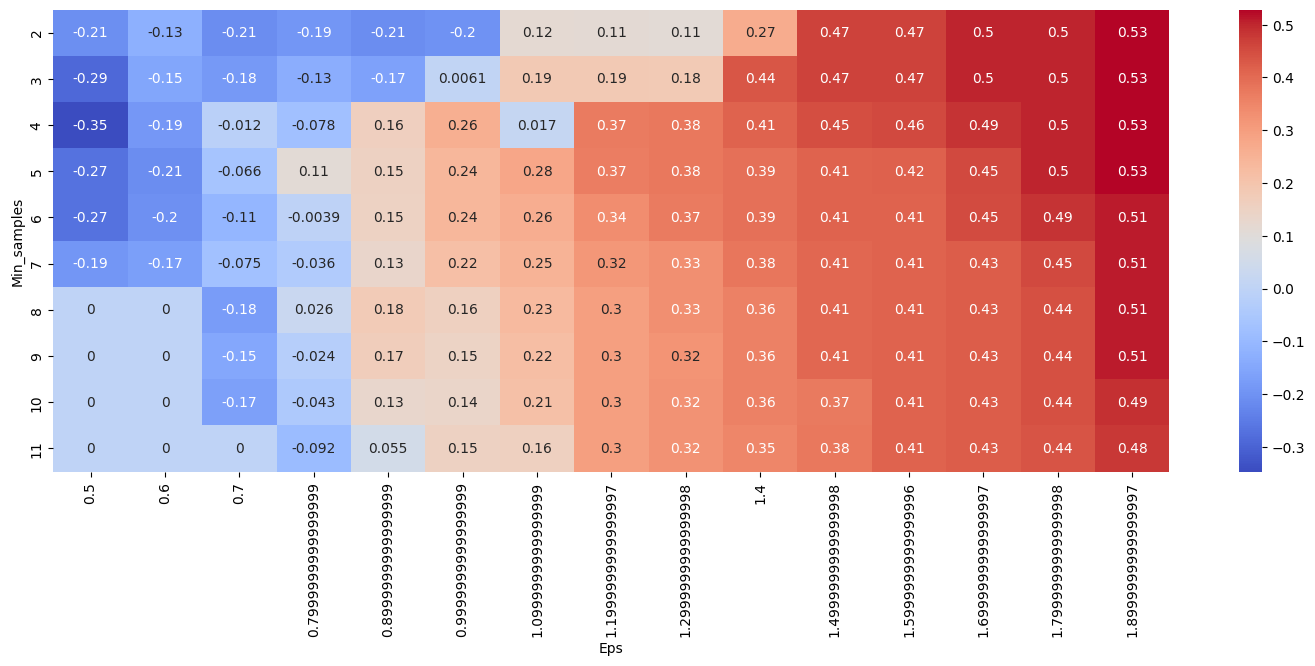

In [40]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

<Axes: xlabel='Eps', ylabel='Min_samples'>

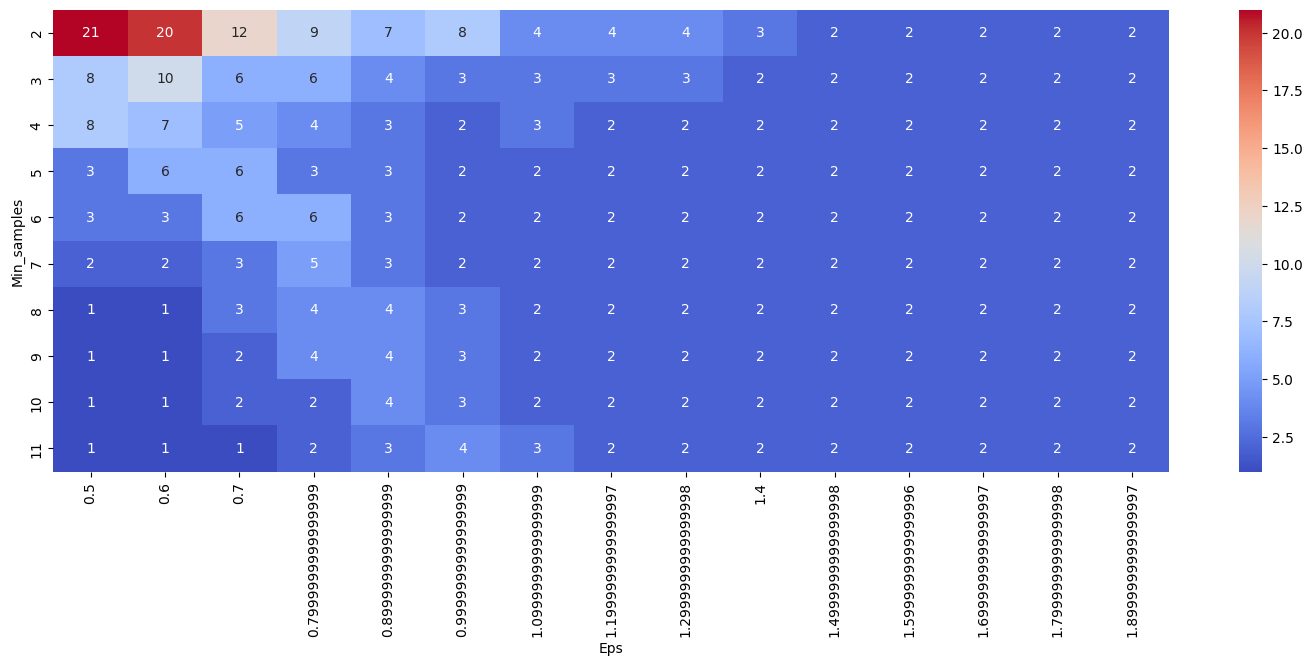

In [41]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_2, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

* Se tiende a pensar que el mejor min_samples es de 2 o 3 con un EPS de 1.89.
* Si miramos el ultimo heatmap podemos observar que la mayoria es de 2 clusters con los mejores numeros, pero no nosr sirve o hay que tener cuidado ya que puede estar retornando 1 cluster y el otro puede ser ruido, por eso me da la suma de 2 clusters.
* Dicho lo anterior nos asefuraremos con 3 clusters.
* El cluster 3 con un mator indice de silueta se encuentra con eps = 1.4 y min_samples = 2.

In [42]:
dbscan_train = DBSCAN(eps = 1.4, min_samples = 2)
y_pred_DBSCAN = dbscan_train.fit_predict(pca_scaled_dim4)
print(silhouette_score(pca_scaled_dim4, y_pred_DBSCAN))

df_country['dbscan_pca'] = y_pred_DBSCAN

0.2654121147403839


In [43]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,1,0,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,2,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,0,1,0,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,2,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,1,0,0


* No es una muy buena predicción pero vamos a ver como se comporta sin el PCA.

### Sin PCA

In [44]:
neaighbors = NearestNeighbors(n_neighbors = 2)
neaighbors_fit = neaighbors.fit(df_country_scaled)
distances, indices = neaighbors_fit.kneighbors(df_country_scaled)

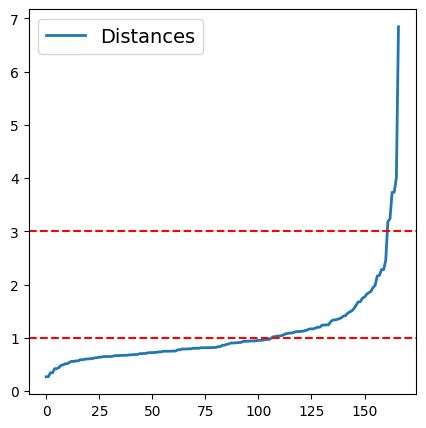

In [45]:
distances = np.sort(distances, axis = 0) # Debido a que el primero es 0 y el que le sigue es la distancia con respecto al primer punto. Si tenemos 2 vecinos este paso se puede omitir.
distances = distances[:, 1]


fig = plt.figure(figsize=(5,5))
plt.plot(distances, linewidth=2, label = "Distances")
plt.axhline(1, color='r', linestyle='--' )
plt.axhline(3, color='r', linestyle='--' )
plt.legend(fontsize=14)
plt.show()

In [46]:
eps_values = np.arange(1, 3, 0.1)
min_samples = np.arange(2, 12)

In [47]:
from itertools import product

dbscan_paramns = list(product(eps_values, min_samples))
nro_clusters = []
sil_score = []

for i in dbscan_paramns:
    y_pred_DBSCAN = DBSCAN(eps = i[0], min_samples = i[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled, y_pred_DBSCAN))
    
    except:
        sil_score.append(0)
    nro_clusters.append(len(np.unique(y_pred_DBSCAN)))

In [48]:
df_paramns_tunning = pd.DataFrame(dbscan_paramns, columns = ['Eps', 'Min_samples'])
df_paramns_tunning['sil_score'] = sil_score
df_paramns_tunning['Nro_clusters'] = nro_clusters

In [49]:
pivot_1 = pd.pivot_table(data = df_paramns_tunning, index = 'Min_samples', columns = 'Eps', values = 'sil_score')
pivot_1

Eps,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9
Min_samples,,,,,,,,,,,,,,,,,,,,
2,-0.068036,-0.040806,0.139255,-0.060312,0.091223,0.108046,0.108009,0.108321,0.160755,0.161330,0.453084,0.453084,0.485665,0.203656,0.536493,0.557682,0.557682,0.557682,0.557682,0.557682
3,0.011714,0.088629,0.126819,-0.020721,0.280277,0.154047,0.154793,0.156355,0.160755,0.161330,0.453084,0.453084,0.485665,0.485665,0.536493,0.557682,0.557682,0.557682,0.557682,0.557682
4,-0.031864,0.110897,0.148793,-0.024735,0.258086,0.289890,0.303425,0.331739,0.361639,0.382615,0.441945,0.453084,0.485665,0.485665,0.511507,0.557682,0.557682,0.557682,0.557682,0.557682
5,-0.024819,0.001231,0.148443,0.202324,0.228209,0.288296,0.291942,0.319878,0.356776,0.366058,0.403244,0.436756,0.469274,0.485665,0.511507,0.557682,0.557682,0.557682,0.557682,0.557682
6,0.009157,-0.013688,0.107031,0.196773,0.215397,0.279554,0.290404,0.319878,0.343381,0.366058,0.403244,0.426910,0.469274,0.485665,0.511507,0.557682,0.557682,0.557682,0.557682,0.557682
7,-0.020091,0.080423,0.083078,0.162976,0.193415,0.279554,0.290404,0.317742,0.343381,0.365482,0.396275,0.422753,0.450937,0.485665,0.511507,0.557682,0.557682,0.557682,0.557682,0.557682
8,-0.170808,0.071241,0.066108,0.134398,0.175862,0.267019,0.290404,0.317742,0.340577,0.365482,0.396275,0.401089,0.428537,0.485665,0.511507,0.557682,0.557682,0.557682,0.557682,0.557682
9,-0.083048,0.043085,0.101676,0.114590,0.156088,0.252390,0.271745,0.317742,0.340577,0.351380,0.396275,0.401089,0.403244,0.469274,0.511507,0.557682,0.557682,0.557682,0.557682,0.557682
10,-0.145783,0.038003,0.078684,0.095520,0.129162,0.253223,0.262432,0.317742,0.328996,0.340577,0.385146,0.396275,0.398153,0.469274,0.492184,0.530657,0.530657,0.557682,0.557682,0.557682


In [50]:
pivot_2 = pd.pivot_table(data = df_paramns_tunning, index = 'Min_samples', columns = 'Eps', values = 'Nro_clusters')
pivot_2

Eps,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9
Min_samples,,,,,,,,,,,,,,,,,,,,
2,13.0,9.0,6.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
3,7.0,5.0,5.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,4.0,5.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,3.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,3.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,4.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
10,2.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<Axes: xlabel='Eps', ylabel='Min_samples'>

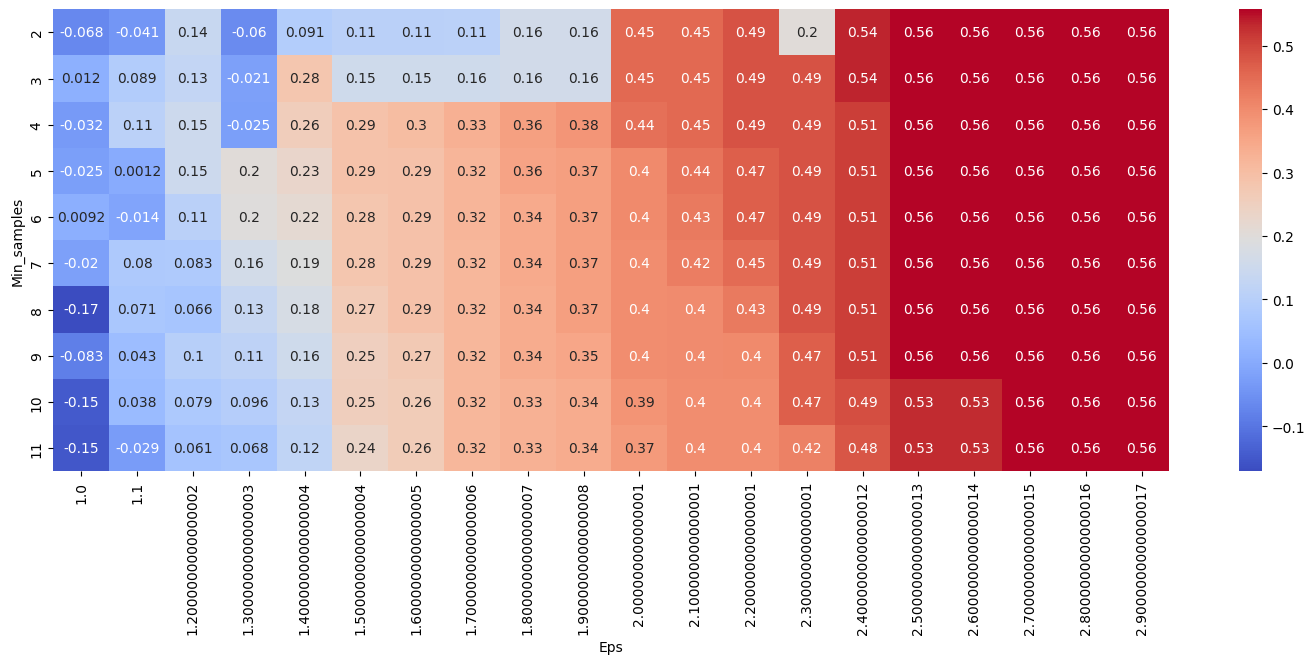

In [51]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

<Axes: xlabel='Eps', ylabel='Min_samples'>

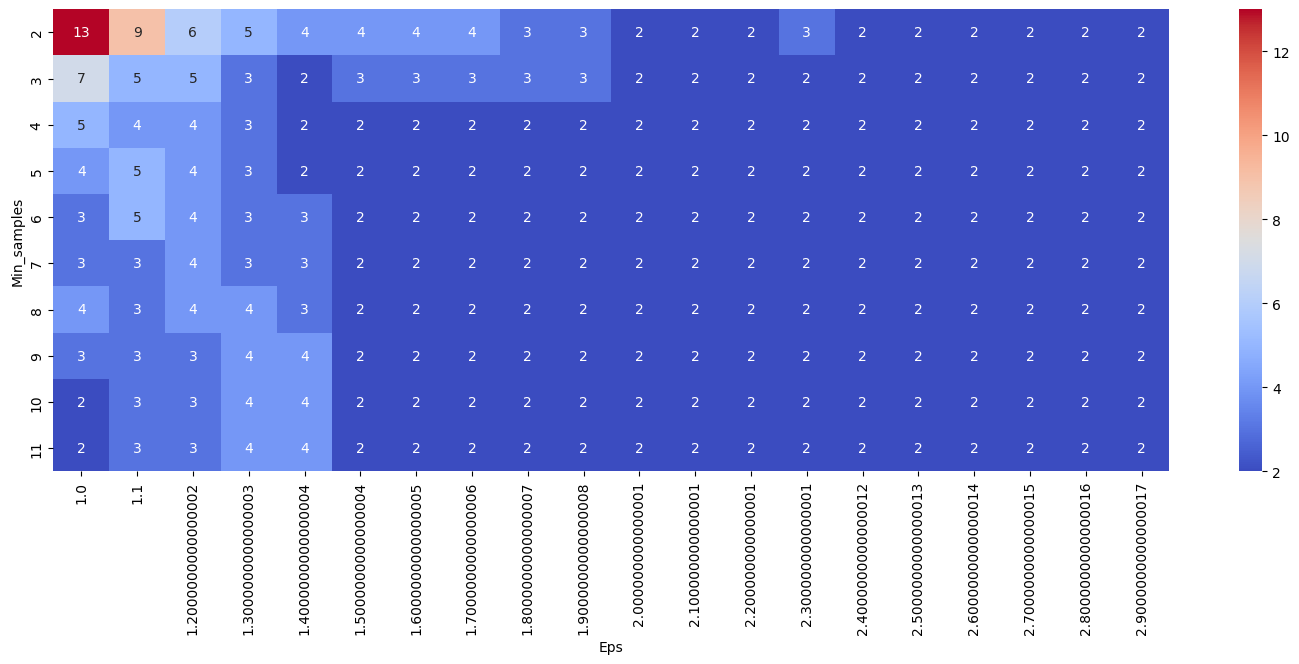

In [52]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_2, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

In [53]:
dbscan_train = DBSCAN(eps = 1.9, min_samples = 3)
y_pred_DBSCAN = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_pred_DBSCAN))

df_country['dbscan'] = y_pred_DBSCAN

0.16132955307173857


# Evaluación de resultados

* Obtuvimos los mejores resultados con KMeans PCA, por lo que ahora lo analizaremos.

In [54]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan'],
      dtype='object')

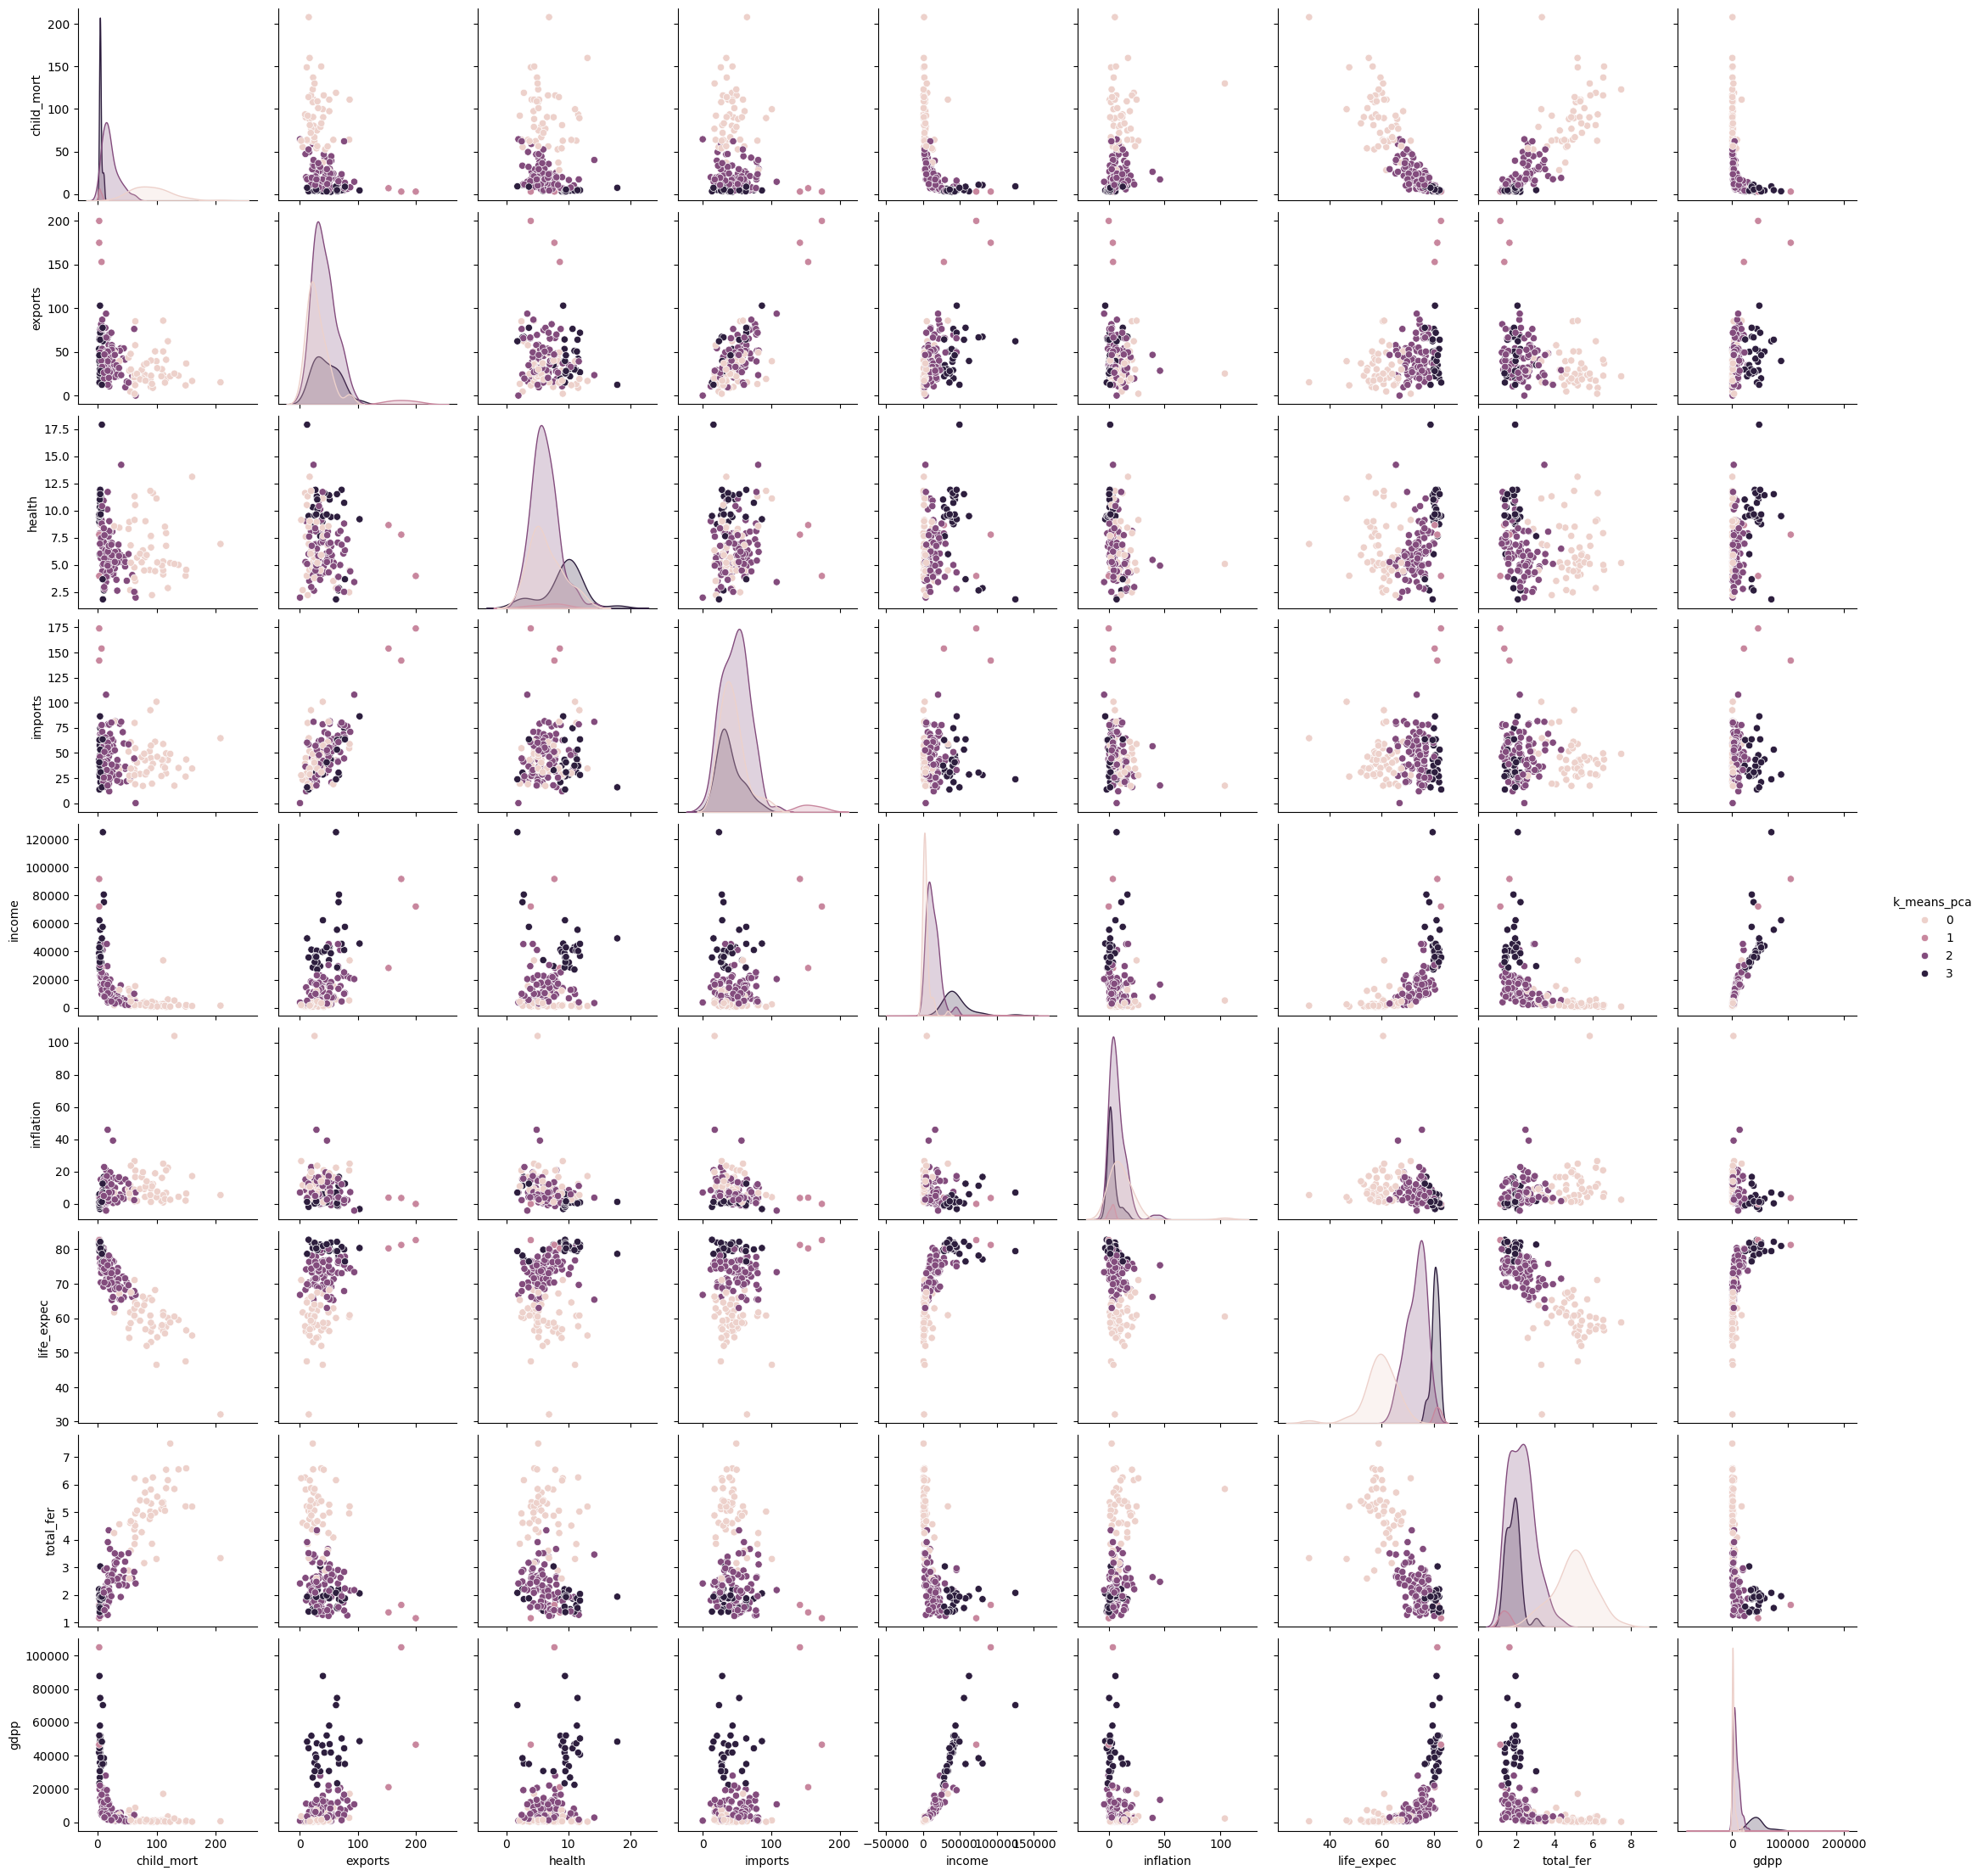

In [56]:
sns.pairplot(data = df_country[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue = 'k_means_pca')

* haremos un zoom a alguna grafica en especifico.

<Axes: xlabel='child_mort', ylabel='gdpp'>

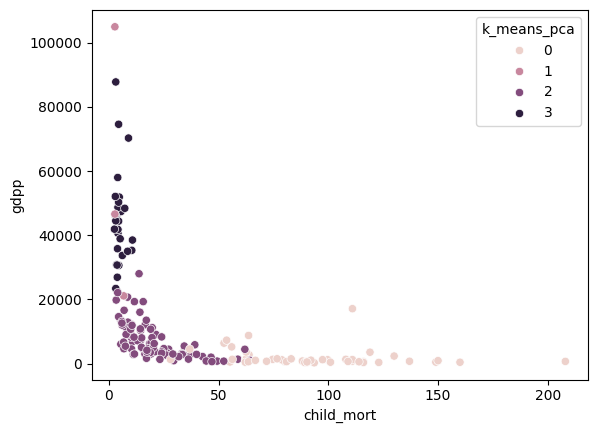

In [57]:
sns.scatterplot(data = df_country, x = 'child_mort', y = 'gdpp', hue = 'k_means_pca' )

* Pareciera estar funcionando el modelo ya que separa los datos y muestra algunos outliers.

In [59]:
df_country[df_country['k_means_pca'] == 1]# outliers

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,4,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1,4,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,4,0,1,-1,-1


In [60]:
df_country[df_country['k_means_pca'] == 3]# Paises desarrollados

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,3,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,3,0,1,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3,3,0,1,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3,3,0,1,1,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3,3,0,1,0,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,3,0,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3,3,0,1,0,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3,3,0,1,0,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3,3,0,1,0,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,3,3,0,1,0,0


* Se puede observar que sin darle la ubicación a los algoritmos, estos los clasificaron y nos hace sentido ya que al analizar cada uno tiene una logica de agrupación.